In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from  sklearn.preprocessing import MinMaxScaler , StandardScaler, RobustScaler

In [ ]:
Data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mystro-AIV4/W-06/Session/housing2.csv")

In [ ]:
data1=Data.copy()

In [ ]:
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
print(data1.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [ ]:
data1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


In [ ]:
data1.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,258
total_rooms,0
total_bedrooms,4882
population,44
households,1305
median_income,2767
median_house_value,0


In [ ]:
data1["housing_median_age"]=data1["housing_median_age"].fillna(data1["housing_median_age"].mean())

In [ ]:
data1["total_bedrooms"]=data1["total_bedrooms"].fillna(data1["total_bedrooms"].mean())

In [ ]:
data1["population"]=data1["population"].fillna(data1["population"].median())

In [ ]:
data1["households"]=data1["households"].fillna(data1["households"].mode()[0])

In [ ]:
data1["median_income"]=data1["median_income"].fillna(data1["median_income"].median())

In [ ]:
def IQR_Handling(clmn):
  Q1=np.quantile(clmn, 0.25)
  Q3=np.quantile(clmn,0.75)
  IQR=Q3-Q1
  Min=Q1-1.5*IQR
  Max=Q3+1.5*IQR
  outlier=clmn[(clmn<Min) | (clmn>Max)]
  print(f"Outlier=\n{outlier}")
  return outlier

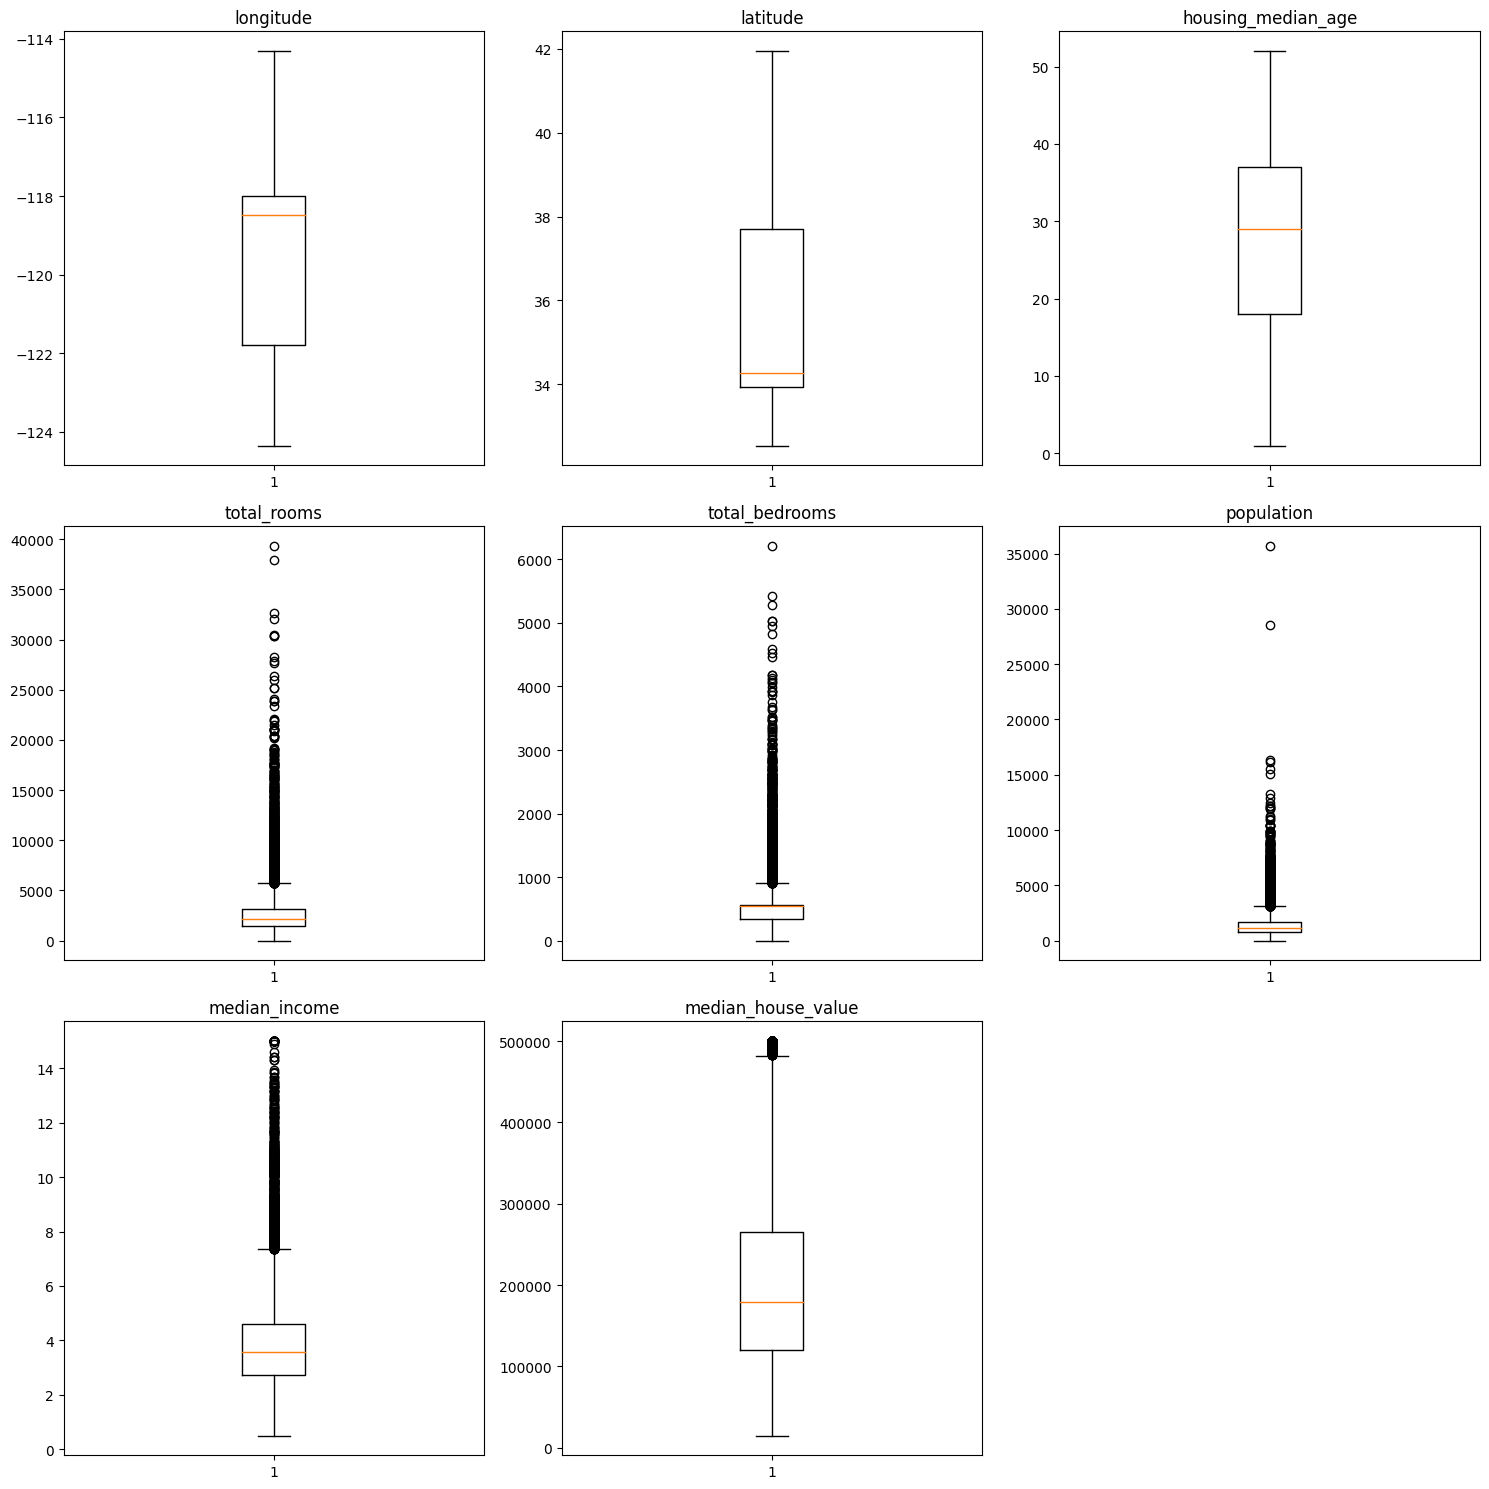

In [ ]:
numeric_columns = data1.select_dtypes(include=["int64", "float64"])

# حساب عدد الأعمدة الرقمية
num_columns = numeric_columns.shape[1]

# إعداد subplots مع تحديد عدد الصفوف والأعمدة بناءً على عدد الأعمدة الرقمية
cols = 3  # عدد الأعمدة في كل صف
rows = math.ceil(num_columns / cols)  # عدد الصفوف المطلوبة

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 5*rows))

# تحويل المصفوفة axes إلى مصفوفة مسطحة
axes = axes.flatten()

# رسم boxplot لكل عمود رقمي
for i, col in enumerate(numeric_columns.columns):
    axes[i].boxplot(numeric_columns[col])
    axes[i].set_title(col)

# إخفاء المخططات الفارغة إذا كان هناك عدد أكبر من المخططات المطلوبة
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# ضبط التخطيط
plt.tight_layout()
plt.show()

In [ ]:
IQR_Handling(data1['total_rooms'])

Outlier=
1         7099
101       5806
104       5871
185       5963
283      12842
         ...  
20543     6861
20544     8800
20563    12139
20567     6809
20629    10035
Name: total_rooms, Length: 1287, dtype: int64


,total_rooms
1,7099
101,5806
104,5871
185,5963
283,12842
...,...
20543,6861
20544,8800
20563,12139
20567,6809


In [ ]:
#outliers_total_rooms=IQR_Handling(data1['total_rooms'])                        #لتعبئة القيم الشاذة بالوسيط من نفس العامود
#median_total_rooms=data1["total_rooms"].median()
#data1["total_rooms"].loc[outliers_total_rooms.index]=median_total_rooms

In [ ]:
data2=data1.copy()

In [ ]:
data2=data2.drop(IQR_Handling(data2["total_rooms"]).index)

Outlier=
1         7099
101       5806
104       5871
185       5963
283      12842
         ...  
20543     6861
20544     8800
20563    12139
20567     6809
20629    10035
Name: total_rooms, Length: 1287, dtype: int64


In [ ]:
df_Zscore(data2["total_bedrooms"])

outlier=
95       10.420228
96        4.333795
98        4.009823
99        3.027283
100       4.774610
           ...    
19169     3.696472
19246     4.158531
19443     3.484031
19538     3.207858
19711     3.122882
Name: total_bedrooms, Length: 407, dtype: float64


,total_bedrooms
95,10.420228
96,4.333795
98,4.009823
99,3.027283
100,4.774610
...,...
19169,3.696472
19246,4.158531
19443,3.484031
19538,3.207858


In [ ]:
data2=data2.drop(df_Zscore(data2["total_bedrooms"]).index)

outlier=
95       10.420228
96        4.333795
98        4.009823
99        3.027283
100       4.774610
           ...    
19169     3.696472
19246     4.158531
19443     3.484031
19538     3.207858
19711     3.122882
Name: total_bedrooms, Length: 407, dtype: float64


In [ ]:
df_Zscore(data2["population"])

outlier=
460      3.893625
485      3.787309
536      4.470523
538      4.597755
761      3.426530
           ...   
20444    3.633934
20509    3.647877
20527    5.884010
20569    3.072722
20604    3.768137
Name: population, Length: 434, dtype: float64


,population
460,3.893625
485,3.787309
536,4.470523
538,4.597755
761,3.426530
...,...
20444,3.633934
20509,3.647877
20527,5.884010
20569,3.072722


In [ ]:
data2=data2.drop(df_Zscore(data2["population"]).index)

outlier=
460      3.893625
485      3.787309
536      4.470523
538      4.597755
761      3.426530
           ...   
20444    3.633934
20509    3.647877
20527    5.884010
20569    3.072722
20604    3.768137
Name: population, Length: 434, dtype: float64


In [ ]:
data2["population"]

,population
0,322.0
2,496.0
3,558.0
4,1166.0
5,1166.0
...,...
20635,845.0
20636,356.0
20637,1007.0
20638,741.0


In [ ]:
df_Zscore(data2["median_income"])

outlier=
0        3.476015
131      5.879756
134      3.387760
135      3.531624
137      3.470000
           ...   
20421    3.339927
20426    4.739327
20436    6.569589
20442    3.074939
20503    3.441901
Name: median_income, Length: 705, dtype: float64


,median_income
0,3.476015
131,5.879756
134,3.387760
135,3.531624
137,3.470000
...,...
20421,3.339927
20426,4.739327
20436,6.569589
20442,3.074939


In [ ]:
data2=data2.drop(df_Zscore(data2["median_income"]).index)

outlier=
0        3.476015
131      5.879756
134      3.387760
135      3.531624
137      3.470000
           ...   
20421    3.339927
20426    4.739327
20436    6.569589
20442    3.074939
20503    3.441901
Name: median_income, Length: 705, dtype: float64


In [ ]:
data2["median_income"]

,median_income
2,7.2574
3,5.6431
4,3.8462
5,4.0368
6,3.6591
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [ ]:
df_Zscore(data2["median_house_value"])

outlier=
89       3.353004
140      3.181546
459      3.353004
489      3.246224
1581     3.291396
           ...   
20322    3.353004
20325    3.353004
20326    3.353004
20422    3.353004
20443    3.353004
Name: median_house_value, Length: 578, dtype: float64


,median_house_value
89,3.353004
140,3.181546
459,3.353004
489,3.246224
1581,3.291396
...,...
20322,3.353004
20325,3.353004
20326,3.353004
20422,3.353004


In [ ]:
data2=data2.drop(df_Zscore(data2["median_house_value"]).index)

outlier=
89       3.353004
140      3.181546
459      3.353004
489      3.246224
1581     3.291396
           ...   
20322    3.353004
20325    3.353004
20326    3.353004
20422    3.353004
20443    3.353004
Name: median_house_value, Length: 578, dtype: float64


In [ ]:
data2["median_house_value"]

,median_house_value
2,352100
3,341300
4,342200
5,269700
6,299200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


**Data Scaling**

In [ ]:
def Min_Max_Scaling(ColumnName):
  scaler=MinMaxScaler()
  scaledData=scaler.fit_transform(ColumnName.to_numpy().reshape(-1,1))
  print(scaledData)
  return scaledData

In [ ]:
def Std_Scaling(ColumnName):
  scaler=StandardScaler()
  scaledData=scaler.fit_transform(ColumnName.to_numpy().reshape(-1,1))
  print(scaledData)
  return scaledData

In [ ]:
def Robust_Scaling(ColumnName):
  scaler=RobustScaler()
  scaledData=scaler.fit_transform(ColumnName.to_numpy().reshape(-1,1))
  print(scaledData)
  return scaledData

In [ ]:
def Decimal_Scaling(ColumnName):
  j=len(str(max(ColumnName)))

  scaledData=ColumnName/(10**j)
  print(scaledData)
  return scaledData

In [ ]:
data3=data2.copy()

In [ ]:
numeric_columns=data3.select_dtypes(include=["int64","float64"])

In [ ]:
for i in numeric_columns:                                                        #To do MinMax Scaling for all columns in the data
 Min_Max_Scaling(numeric_columns[i])
 print(numeric_columns[i])
 print("___________________")


[[0.21399594]
 [0.21298174]
 [0.21298174]
 ...
 [0.31744422]
 [0.30730223]
 [0.31541582]]
2       -122.24
3       -122.25
4       -122.25
5       -122.25
6       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 17229, dtype: float64
___________________
[[0.5642933 ]
 [0.5642933 ]
 [0.5642933 ]
 ...
 [0.73219979]
 [0.73219979]
 [0.72582359]]
2        37.85
3        37.85
4        37.85
5        37.85
6        37.84
         ...  
20635    39.48
20636    39.49
20637    39.43
20638    39.43
20639    39.37
Name: latitude, Length: 17229, dtype: float64
___________________
[[1.        ]
 [1.        ]
 [0.54267222]
 ...
 [0.31372549]
 [0.33333333]
 [0.29411765]]
2        52.000000
3        52.000000
4        28.676283
5        28.676283
6        28.676283
           ...    
20635    25.000000
20636    18.000000
20637    17.000000
20638    18.000000
20639    16.000000
Name: housing_median_age, Length: 17229, dtype:

#لوضع الداتا المحجمة في ملف جديد

In [ ]:
Scaleddata=pd.DataFrame()                                                        #يتم انشاء Data Frame فارغة لنضح فيها البيانات المحجمة

for i in numeric_columns:
 Scaleddata[i]=Min_Max_Scaling(numeric_columns[i]).flatten()                     #flatten تستخدم لتحويل المصفوفة الثنائية الابعاد الى مصفوفة احادية


[[0.21399594]
 [0.21298174]
 [0.21298174]
 ...
 [0.31744422]
 [0.30730223]
 [0.31541582]]
[[0.5642933 ]
 [0.5642933 ]
 [0.5642933 ]
 ...
 [0.73219979]
 [0.73219979]
 [0.72582359]]
[[1.        ]
 [1.        ]
 [0.54267222]
 ...
 [0.31372549]
 [0.33333333]
 [0.29411765]]
[[0.25765037]
 [0.22370735]
 [0.28578966]
 ...
 [0.3960605 ]
 [0.3267675 ]
 [0.48944777]]
[[0.17455896]
 [0.21634169]
 [0.25812442]
 ...
 [0.44846797]
 [0.37790158]
 [0.57010214]]
[[0.17476072]
 [0.19673875]
 [0.41226515]
 ...
 [0.35590216]
 [0.26160936]
 [0.49060617]]
[[0.94193   ]
 [0.71691223]
 [0.46644178]
 ...
 [0.16728231]
 [0.19058837]
 [0.26326647]]
[[0.74811419]
 [0.7241462 ]
 [0.72614353]
 ...
 [0.17155088]
 [0.15468452]
 [0.16511504]]


In [ ]:
Scaleddata

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
0,0.213996,0.564293,1.000000,0.257650,0.174559,0.174761,0.941930,0.748114
1,0.212982,0.564293,1.000000,0.223707,0.216342,0.196739,0.716912,0.724146
2,0.212982,0.564293,0.542672,0.285790,0.258124,0.412265,0.466442,0.726144
3,0.212982,0.564293,0.542672,0.161273,0.195915,0.412265,0.493010,0.565247
4,0.212982,0.563231,0.542672,0.445480,0.499462,0.412265,0.440362,0.630715
...,...,...,...,...,...,...,...,...
17224,0.330629,0.737513,0.470588,0.292473,0.345404,0.298476,0.147809,0.140037
17225,0.318458,0.738576,0.333333,0.122230,0.137419,0.125133,0.286712,0.137818
17226,0.317444,0.732200,0.313725,0.396060,0.448468,0.355902,0.167282,0.171551
17227,0.307302,0.732200,0.333333,0.326767,0.377902,0.261609,0.190588,0.154685


In [ ]:
Scaleddata.to_csv("Scaleddata")